In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge

import multiprocessing
import random
from itertools import product

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score


from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [ ]:
datos = pd.read_csv("datos_limpios_para_knn_nb.csv")

In [27]:
#se crea una variables para el numero de interaciones
numI = 60
#se crea un data frame para guardar los datos de los resulatados de la iteraciones
allResults=pd.DataFrame(np.zeros((numI,11)),columns=["meanF1Train",'stdF1Train',"meanF1Test",'stdF1Test','meanRecallTest',"stdRecallTest",'meanPrecisionTest',"stdPrecisionTest",'meanAccTest',"stdAccTest","ejeX"])
allResults.iloc[:,allResults.shape[1]-1]=list(range(1,numI+1))

#se crea un modelo para escalar los datos ya que no todos estan en la  misma escala
scaler = StandardScaler()
scaler.fit(datos2.iloc[:,1:])
Data = scaler.transform(datos2.iloc[:,1:])
#generamos los kfold
numFolds=10


In [34]:
allResults

,meanF1Train,stdF1Train,meanF1Test,stdF1Test,meanRecallTest,stdRecallTest,meanPrecisionTest,stdPrecisionTest,meanAccTest,stdAccTest,ejeX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [ ]:
for k in range(1,numI+1):
    
    KNN = KNeighborsClassifier(n_neighbors=k,weights="uniform",metric="euclidean")
    kf = KFold(n_splits=numFolds,shuffle=True)
    #se guarda los errores de cada kfold
    allF1Test=np.zeros((numFolds,1))
    allF1Train=np.zeros((numFolds,1))
    allPrecision=np.zeros((numFolds,1))
    allRecall=np.zeros((numFolds,1))
    allAcc=np.zeros((numFolds,1))
    index=0
    
    for train_index, test_index in kf.split(Data):
            KNN=KNN.fit(Data[train_index,:],datos2.iloc[train_index,0])
            prediccion=KNN.predict(Data[train_index,:])
            print(index,"",end="")
        
            allF1Train[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
        
            prediccion=KNN.predict(Data[test_index,:])
        
            allF1Test[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
            allRecall[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
            allPrecision[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)        
            allAcc[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion) 
           
            index+=1
            
    print("\n")
    #se calcula la media y desviacion estandar de los valores guardados
    allResults.iloc[k-1,0]=allF1Train.mean()
    allResults.iloc[k-1,1]=allF1Train.std()
    allResults.iloc[k-1,2]=allF1Test.mean()
    allResults.iloc[k-1,3]=allF1Test.std()
    allResults.iloc[k-1,4]=allRecall.mean()
    allResults.iloc[k-1,5]=allRecall.std()    
    allResults.iloc[k-1,6]=allPrecision.mean()
    allResults.iloc[k-1,7]=allPrecision.std()    
    allResults.iloc[k-1,8]=allAcc.mean()
    allResults.iloc[k-1,9]=allAcc.std()
    print(k,"",end="")

In [ ]:
#se ve los resultados que se graficaran
allResults

,meanF1Train,stdF1Train,meanF1Test,stdF1Test,meanRecallTest,stdRecallTest,meanPrecisionTest,stdPrecisionTest,meanAccTest,stdAccTest,ejeX
0,1.000000,0.000000,0.412151,0.006433,0.408950,0.007958,0.415463,0.006557,0.59853,0.004809,1
1,0.776837,0.000573,0.485974,0.005400,0.625606,0.005999,0.397350,0.006574,0.54452,0.005124,2
2,0.684332,0.000681,0.406406,0.007661,0.368733,0.009295,0.452821,0.008674,0.62937,0.004470,3
3,0.683031,0.000677,0.467513,0.009501,0.511262,0.011973,0.430706,0.008721,0.59924,0.005405,4
4,0.591530,0.001386,0.395514,0.005295,0.339763,0.006819,0.473284,0.005844,0.64259,0.005160,5
5,0.622765,0.001145,0.450334,0.007883,0.448888,0.009853,0.451897,0.008824,0.62291,0.004594,6
6,0.541458,0.001811,0.388733,0.005679,0.321894,0.006450,0.490766,0.007868,0.65163,0.003845,7
7,0.579516,0.001673,0.441334,0.008382,0.413258,0.010910,0.473629,0.007335,0.64001,0.004027,8
8,0.508954,0.002024,0.383626,0.009092,0.309872,0.009133,0.503652,0.010756,0.65736,0.004697,9
9,0.548278,0.001163,0.431458,0.006792,0.386308,0.006228,0.488657,0.010170,0.64964,0.003213,10


In [8]:
from matplotlib import style
from plotnine import *

In [9]:
#se guardo los resultados para que no se pierdan los valores, pero una vez realizado se dejo comentrado para no perder los datos en caso de correr el programa otra vez
#allResults.to_csv("Resultados_con_100k")

In [10]:
#se carga los valores de los resultados 
#allResults = pd.read_csv("Resultados_con_100k")
#allResults.head(2)

,Unnamed: 0,meanF1Train,stdF1Train,meanF1Test,stdF1Test,meanRecallTest,stdRecallTest,meanPrecisionTest,stdPrecisionTest,meanAccTest,stdAccTest,ejeX
0,0,1.000000,0.000000,0.412151,0.006433,0.408950,0.007958,0.415463,0.006557,0.59853,0.004809,1
1,1,0.776837,0.000573,0.485974,0.005400,0.625606,0.005999,0.397350,0.006574,0.54452,0.005124,2


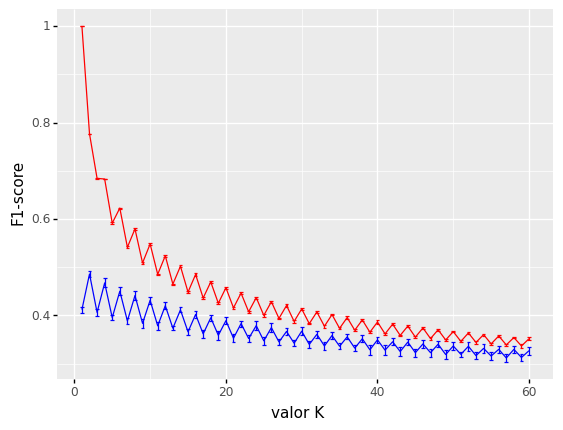

In [11]:
from matplotlib import style
from plotnine import *

print(ggplot(allResults)+aes(x="ejeX")+
 geom_line(aes(y="meanF1Train"),color="red")+
 geom_errorbar(aes(ymin="meanF1Train-stdF1Train",ymax="meanF1Train+stdF1Train"),color="red")+
 geom_line(aes(y="meanF1Test"),color="blue")+
 geom_errorbar(aes(ymin="meanF1Test-stdF1Test",ymax="meanF1Test+stdF1Test"),color="blue")+
 labs(x="valor K",y="F1-score")
)

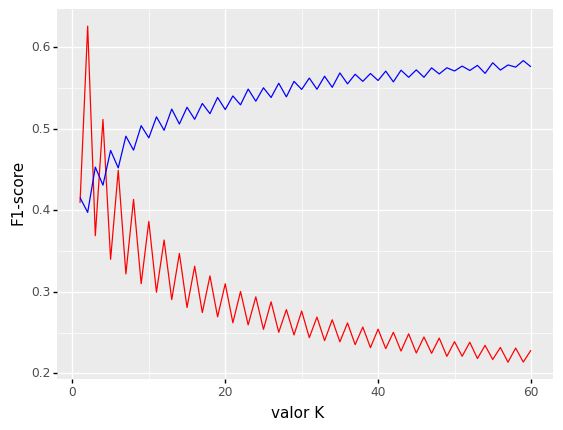

In [12]:
print(ggplot(allResults)+aes(x="ejeX")+
 geom_line(aes(y="meanRecallTest"),color="red")+
 geom_line(aes(y="meanPrecisionTest"),color="blue")+
 labs(x="valor K",y="F1-score")
)

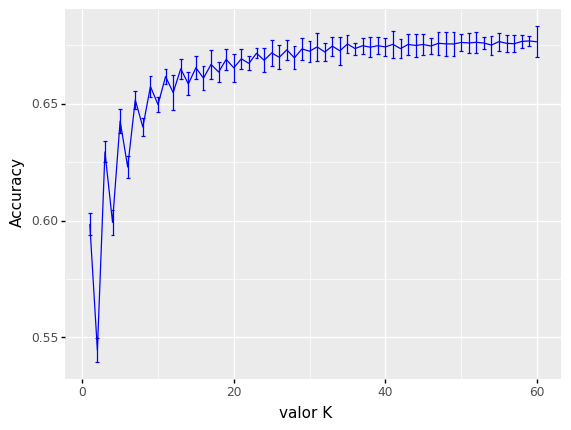

In [24]:
#Graficando los resultados para accuracy
print(ggplot(allResults)+aes(x="ejeX")+
 geom_line(aes(y="meanAccTest"),color="blue")+
 geom_errorbar(aes(ymin="meanAccTest-stdAccTest",ymax="meanAccTest+stdAccTest"),color="blue")+
 labs(x="valor K",y="Accuracy")
)

In [41]:
#se elige un k 10-15

In [15]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
temp=kf.split(datos2)

#se crea el modelo
KNN = KNeighborsClassifier(n_neighbors=10,weights="uniform",metric="euclidean")
allF1Test10=np.zeros((numFolds,1))
allF1Train10=np.zeros((numFolds,1))
allAcc10=np.zeros((numFolds,1))
allRecall10=np.zeros((numFolds,1))
allPrecision10=np.zeros((numFolds,1))

#para escalar los datos
scaler = StandardScaler()

index=0
for train_index, test_index in temp:

    scaler = scaler.fit(datos2.iloc[train_index,1:])
    numericData = scaler.transform(datos2.iloc[:,1:])
    KNN=KNN.fit(numericData[train_index,:],datos2.iloc[train_index,0])
    prediccion=KNN.predict(numericData[train_index,:])
    allF1Train10[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test10[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allRecall10[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allPrecision10[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allAcc10[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion)
    index+=1

#Imprimiendo los resultados del modelo entrenado 
print("Average F1-score train: ",allF1Train10.mean(),"+-",allF1Train10.std())
print("Average F1-score test: ",allF1Test10.mean(),"+-",allF1Test10.std())
print("Average recall test: ",allRecall10.mean(),"+-",allRecall10.std())
print("Average precision test: ",allPrecision10.mean(),"+-",allPrecision10.std())
print("Average accuracy test: ",allAcc10.mean(),"+-",allAcc10.std())

NameError: name 'datos2' is not defined

In [14]:
resultadosDFk10 = pd.DataFrame()
resultadosDFk10['Mean'] = None
resultadosDFk10['Std'] = None

resultadosDFk10.loc['F1-score Test'] = [allF1Test10.mean(),allF1Test10.std()]
resultadosDFk10.loc['Recall Test'] = [allRecall10.mean(),allRecall10.std()]
resultadosDFk10.loc['Precision'] = [allPrecision10.mean(),allPrecision10.std()]
resultadosDFk10.loc['Accurracy Test'] = [allAcc10.mean(),allAcc10.std()]

resultadosDFk10

NameError: name 'allF1Test10' is not defined

In [111]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
temp=kf.split(datos2)

#se crea el modelo
KNN = KNeighborsClassifier(n_neighbors=11,weights="uniform",metric="euclidean")
allF1Test11=np.zeros((numFolds,1))
allF1Trai11n=np.zeros((numFolds,1))
allAcc11=np.zeros((numFolds,1))
allRecall11=np.zeros((numFolds,1))
allPrecision11=np.zeros((numFolds,1))

#para escalar los datos
scaler = StandardScaler()

index=0
for train_index, test_index in temp:

    scaler = scaler.fit(datos2.iloc[train_index,1:])
    numericData = scaler.transform(datos2.iloc[:,1:])
    KNN=KNN.fit(numericData[train_index,:],datos2.iloc[train_index,0])
    prediccion=KNN.predict(numericData[train_index,:])
    allF1Trai11n[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test11[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allRecall11[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allPrecision11[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allAcc11[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion)
    index+=1

#Imprimiendo los resultados del modelo entrenado 
print("Average F1-score train: ",allF1Trai11n.mean(),"+-",allF1Trai11n.std())
print("Average F1-score test: ",allF1Test11.mean(),"+-",allF1Test11.std())
print("Average recall test: ",allRecall11.mean(),"+-",allRecall11.std())
print("Average precision test: ",allPrecision11.mean(),"+-",allPrecision11.std())
print("Average accuracy test: ",allAcc11.mean(),"+-",allAcc11.std())

Average F1-score train:  0.48626073707952305 +- 0.0013295868218561337
Average F1-score test:  0.38314803354944005 +- 0.006828760638669031
Average recall test:  0.30546852270431485 +- 0.008895225162583186
Average precision test:  0.5141890999789238 +- 0.0067012374119493545
Average accuracy test:  0.66064 +- 0.005485107109255018


In [ ]:
resultadosDFk11 = pd.DataFrame()
resultadosDFk11['Mean'] = None
resultadosDFk11['Std'] = None

resultadosDFk11.loc['F1-score Test'] = [allF1Test11.mean(),allF1Test11.std()]
resultadosDFk11.loc['Recall Test'] = [allRecall.mean(),allRecall11.std()]
resultadosDFk11.loc['Precision'] = [allPrecision.mean(),allPrecision11.std()]
resultadosDFk11.loc['Accurracy Test'] = [allAcc11.mean(),allAcc11.std()]

resultadosDFk11

In [116]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
temp=kf.split(datos2)

#se crea el modelo
KNN = KNeighborsClassifier(n_neighbors=12,weights="uniform",metric="euclidean")
allF1Test12=np.zeros((numFolds,1))
allF1Train12=np.zeros((numFolds,1))
allAcc12=np.zeros((numFolds,1))
allRecall12=np.zeros((numFolds,1))
allPrecision12=np.zeros((numFolds,1))

#para escalar los datos
scaler = StandardScaler()

index=0
for train_index, test_index in temp:

    scaler = scaler.fit(datos2.iloc[train_index,1:])
    numericData = scaler.transform(datos2.iloc[:,1:])
    KNN=KNN.fit(numericData[train_index,:],datos2.iloc[train_index,0])
    prediccion=KNN.predict(numericData[train_index,:])
    allF1Train12[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test12[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allRecall12[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allPrecision12[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allAcc12[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion)
    index+=1

#Imprimiendo los resultados del modelo entrenado 
print("Average F1-score train: ",allF1Train12.mean(),"+-",allF1Train12.std())
print("Average F1-score test: ",allF1Test12.mean(),"+-",allF1Test12.std())
print("Average recall test: ",allRecall12.mean(),"+-",allRecall12.std())
print("Average precision test: ",allPrecision12.mean(),"+-",allPrecision12.std())
print("Average accuracy test: ",allAcc12.mean(),"+-",allAcc12.std())

Average F1-score train:  0.5252300328758709 +- 0.0014862475578367976
Average F1-score test:  0.42056197893919745 +- 0.008342714843118817
Average recall test:  0.36559021950280596 +- 0.008310496825235558
Average precision test:  0.4951819607763029 +- 0.012220888640120603
Average accuracy test:  0.65236 +- 0.005018605383968721


In [117]:
resultadosDFk12 = pd.DataFrame()
resultadosDFk12['Mean'] = None
resultadosDFk12['Std'] = None

resultadosDFk12.loc['F1-score Test'] = [allF1Test12.mean(),allF1Test12.std()]
resultadosDFk12.loc['Recall Test'] = [allRecall12.mean(),allRecall12.std()]
resultadosDFk12.loc['Precision'] = [allPrecision12.mean(),allPrecision12.std()]
resultadosDFk12.loc['Accurracy Test'] = [allAcc12.mean(),allAcc12.std()]

resultadosDFk12

,Mean,Std
F1-score Test,0.420562,0.008343
Recall Test,0.365590,0.008310
Precision,0.495182,0.012221
Accurracy Test,0.652360,0.005019


In [118]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
temp=kf.split(datos2)

#se crea el modelo
KNN = KNeighborsClassifier(n_neighbors=13,weights="uniform",metric="euclidean")
allF1Test13=np.zeros((numFolds,1))
allF1Train13=np.zeros((numFolds,1))
allAcc13=np.zeros((numFolds,1))
allRecall13=np.zeros((numFolds,1))
allPrecision13=np.zeros((numFolds,1))

#para escalar los datos
scaler = StandardScaler()

index=0
for train_index, test_index in temp:

    scaler = scaler.fit(datos2.iloc[train_index,1:])
    numericData = scaler.transform(datos2.iloc[:,1:])
    KNN=KNN.fit(numericData[train_index,:],datos2.iloc[train_index,0])
    prediccion=KNN.predict(numericData[train_index,:])
    allF1Train13[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test13[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allRecall13[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allPrecision13[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allAcc13[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion)
    index+=1

#Imprimiendo los resultados del modelo entrenado 
print("Average F1-score train: ",allF1Train13.mean(),"+-",allF1Train13.std())
print("Average F1-score test: ",allF1Test13.mean(),"+-",allF1Test13.std())
print("Average recall test: ",allRecall13.mean(),"+-",allRecall13.std())
print("Average precision test: ",allPrecision13.mean(),"+-",allPrecision13.std())
print("Average accuracy test: ",allAcc13.mean(),"+-",allAcc13.std())

Average F1-score train:  0.46907464272292937 +- 0.001717410139394297
Average F1-score test:  0.3778855196982111 +- 0.007252828566431031
Average recall test:  0.29620176061349357 +- 0.0068556980076554105
Average precision test:  0.5219026686731096 +- 0.009075334750389637
Average accuracy test:  0.66345 +- 0.004801093625414933


In [119]:
resultadosDFk13 = pd.DataFrame()
resultadosDFk13['Mean'] = None
resultadosDFk13['Std'] = None

resultadosDFk13.loc['F1-score Test'] = [allF1Test13.mean(),allF1Test13.std()]
resultadosDFk13.loc['Recall Test'] = [allRecall13.mean(),allRecall13.std()]
resultadosDFk13.loc['Precision'] = [allPrecision13.mean(),allPrecision13.std()]
resultadosDFk13.loc['Accurracy Test'] = [allAcc13.mean(),allAcc13.std()]

resultadosDFk13

,Mean,Std
F1-score Test,0.377886,0.007253
Recall Test,0.296202,0.006856
Precision,0.521903,0.009075
Accurracy Test,0.663450,0.004801


In [120]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
temp=kf.split(datos2)

#se crea el modelo
KNN = KNeighborsClassifier(n_neighbors=14,weights="uniform",metric="euclidean")
allF1Test14=np.zeros((numFolds,1))
allF1Train14=np.zeros((numFolds,1))
allAcc14=np.zeros((numFolds,1))
allRecall14=np.zeros((numFolds,1))
allPrecision14=np.zeros((numFolds,1))

#para escalar los datos
scaler = StandardScaler()

index=0
for train_index, test_index in temp:

    scaler = scaler.fit(datos2.iloc[train_index,1:])
    numericData = scaler.transform(datos2.iloc[:,1:])
    KNN=KNN.fit(numericData[train_index,:],datos2.iloc[train_index,0])
    prediccion=KNN.predict(numericData[train_index,:])
    allF1Train14[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test14[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allRecall14[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allPrecision14[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allAcc14[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion)
    index+=1

#Imprimiendo los resultados del modelo entrenado 
print("Average F1-score train: ",allF1Train14.mean(),"+-",allF1Train14.std())
print("Average F1-score test: ",allF1Test14.mean(),"+-",allF1Test14.std())
print("Average recall test: ",allRecall14.mean(),"+-",allRecall14.std())
print("Average precision test: ",allPrecision14.mean(),"+-",allPrecision14.std())
print("Average accuracy test: ",allAcc14.mean(),"+-",allAcc14.std())

Average F1-score train:  0.5045106154969646 +- 0.0016638331553279293
Average F1-score test:  0.41324077704044326 +- 0.006153251303483102
Average recall test:  0.3492681452733829 +- 0.005893398479518625
Average precision test:  0.5060093062394361 +- 0.00936465141711126
Average accuracy test:  0.6577000000000001 +- 0.002942108087749324


In [121]:
resultadosDFk14 = pd.DataFrame()
resultadosDFk14['Mean'] = None
resultadosDFk14['Std'] = None

resultadosDFk14.loc['F1-score Test'] = [allF1Test14.mean(),allF1Test14.std()]
resultadosDFk14.loc['Recall Test'] = [allRecall14.mean(),allRecall14.std()]
resultadosDFk14.loc['Precision'] = [allPrecision14.mean(),allPrecision14.std()]
resultadosDFk14.loc['Accurracy Test'] = [allAcc14.mean(),allAcc14.std()]

resultadosDFk14

,Mean,Std
F1-score Test,0.413241,0.006153
Recall Test,0.349268,0.005893
Precision,0.506009,0.009365
Accurracy Test,0.657700,0.002942


In [122]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
temp=kf.split(datos2)

#se crea el modelo
KNN = KNeighborsClassifier(n_neighbors=15,weights="uniform",metric="euclidean")
allF1Test15=np.zeros((numFolds,1))
allF1Train15=np.zeros((numFolds,1))
allAcc15=np.zeros((numFolds,1))
allRecall15=np.zeros((numFolds,1))
allPrecision15=np.zeros((numFolds,1))

#para escalar los datos
scaler = StandardScaler()

index=0
for train_index, test_index in temp:

    scaler = scaler.fit(datos2.iloc[train_index,1:])
    numericData = scaler.transform(datos2.iloc[:,1:])
    KNN=KNN.fit(numericData[train_index,:],datos2.iloc[train_index,0])
    prediccion=KNN.predict(numericData[train_index,:])
    allF1Train15[index]=mt.f1_score(datos2.iloc[train_index,0],prediccion,pos_label=0)
    prediccion=KNN.predict(numericData[test_index,:])
    allF1Test15[index]=mt.f1_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allRecall15[index]=mt.recall_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allPrecision15[index]=mt.precision_score(datos2.iloc[test_index,0],prediccion,pos_label=0)
    allAcc15[index]=mt.accuracy_score(datos2.iloc[test_index,0],prediccion)
    index+=1

#Imprimiendo los resultados del modelo entrenado 
print("Average F1-score train: ",allF1Train15.mean(),"+-",allF1Train15.std())
print("Average F1-score test: ",allF1Test15.mean(),"+-",allF1Test15.std())
print("Average recall test: ",allRecall15.mean(),"+-",allRecall15.std())
print("Average precision test: ",allPrecision15.mean(),"+-",allPrecision15.std())
print("Average accuracy test: ",allAcc15.mean(),"+-",allAcc15.std())

Average F1-score train:  0.45300994132463046 +- 0.0018865980123867014
Average F1-score test:  0.371267236274989 +- 0.008518480308371369
Average recall test:  0.2859523902629506 +- 0.007775355201065379
Average precision test:  0.5292948191924653 +- 0.010901856646720188
Average accuracy test:  0.66579 +- 0.004184363750918411


In [123]:
resultadosDFk15 = pd.DataFrame()
resultadosDFk15['Mean'] = None
resultadosDFk15['Std'] = None

resultadosDFk15.loc['F1-score Test'] = [allF1Test15.mean(),allF1Test15.std()]
resultadosDFk15.loc['Recall Test'] = [allRecall15.mean(),allRecall15.std()]
resultadosDFk15.loc['Precision'] = [allPrecision15.mean(),allPrecision15.std()]
resultadosDFk15.loc['Accurracy Test'] = [allAcc15.mean(),allAcc15.std()]

resultadosDFk15

,Mean,Std
F1-score Test,0.371267,0.008518
Recall Test,0.285952,0.007775
Precision,0.529295,0.010902
Accurracy Test,0.665790,0.004184


In [139]:
KNN = KNeighborsClassifier(n_neighbors=10,weights="uniform")
X_train, X_test, y_train, y_test = train_test_split(datos2.iloc[:,1:], datos2.iloc[:,0], test_size=0.30,random_state=0)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNN=KNN.fit(X_train,y_train)
prediccion1=KNN.predict_proba(X_test)
prediccionFija=KNN.predict(X_test)


In [140]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test==0,prediccionFija==0))
print(classification_report(y_test==0,prediccionFija==0))

[[15309  4444]
 [ 6216  4031]]
              precision    recall  f1-score   support

       False       0.71      0.78      0.74     19753
        True       0.48      0.39      0.43     10247

    accuracy                           0.64     30000
   macro avg       0.59      0.58      0.59     30000
weighted avg       0.63      0.64      0.64     30000



In [171]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,prediccion1[:,1])
auc_roc

0.6243534433705072

In [172]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediccion1[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6243534433705072

In [173]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediccion1[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6243534433705072

Text(0.5, 0, 'False Positive Rate')

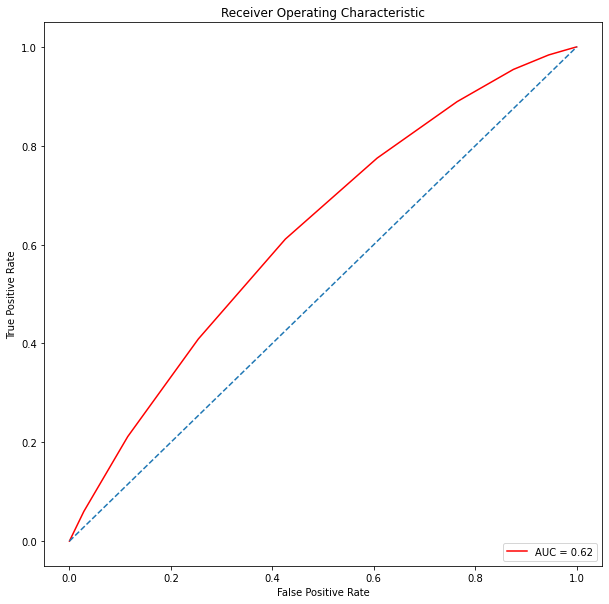

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [16]:
#se carga los datos de evaluacion
archivo_test='ALUMNOS-evalData.csv'

In [17]:
eval=pd.read_csv(archivo_test)

In [18]:
eval.head(2)

,Unnamed: 0,date,fligth_number,origin,destination,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,145420,2009-04-27,5960,ADZ,MDE,989,0,143,2,0,...,5,5,0,53,0,179,13:27:00,174.0,7471.1,232
1,117679,2009-04-03,6960,PIU,LIM,849,0,62,0,2,...,0,0,0,0,0,126,22:30:00,144.0,3608.0,126


In [19]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248880 entries, 0 to 248879
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       248880 non-null  int64  
 1   date             248880 non-null  object 
 2   fligth_number    248880 non-null  int64  
 3   origin           248880 non-null  object 
 4   destination      248880 non-null  object 
 5   distance         248880 non-null  int64  
 6   denied_boarding  248880 non-null  int64  
 7   pax_midlow       248880 non-null  int64  
 8   pax_high         248880 non-null  int64  
 9   pax_midhigh      248880 non-null  int64  
 10  pax_low          248880 non-null  int64  
 11  pax_freqflyer    248880 non-null  int64  
 12  group_bookings   248880 non-null  int64  
 13  out_of_stock     248880 non-null  int64  
 14  dom_cnx          248880 non-null  int64  
 15  int_cnx          248880 non-null  int64  
 16  p2p              248880 non-null  int6

In [21]:
def eliminar_columna(nombre_columna):
    eval.drop(nombre_columna, axis=1, inplace=True) #se edita df principal

In [22]:
#elimina las variables que no se van a utilizar
eliminar=['fligth_number','out_of_stock','date','departure_time','origin','destination']
for i in eliminar:
    eliminar_columna(i)
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248880 entries, 0 to 248879
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       248880 non-null  int64  
 1   distance         248880 non-null  int64  
 2   denied_boarding  248880 non-null  int64  
 3   pax_midlow       248880 non-null  int64  
 4   pax_high         248880 non-null  int64  
 5   pax_midhigh      248880 non-null  int64  
 6   pax_low          248880 non-null  int64  
 7   pax_freqflyer    248880 non-null  int64  
 8   group_bookings   248880 non-null  int64  
 9   dom_cnx          248880 non-null  int64  
 10  int_cnx          248880 non-null  int64  
 11  p2p              248880 non-null  int64  
 12  capacity         248880 non-null  float64
 13  revenues_usd     248880 non-null  float64
 14  bookings         248880 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 28.5 MB


In [23]:
eval

,Unnamed: 0,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,dom_cnx,int_cnx,p2p,capacity,revenues_usd,bookings
0,145420,989,0,143,2,0,82,5,5,53,0,179,174.0,7471.1,232
1,117679,849,0,62,0,2,62,0,0,0,0,126,144.0,3608.0,126
2,781281,3464,0,136,6,0,113,29,0,0,138,146,220.0,25139.9,284
3,291825,1125,0,32,0,0,26,18,0,1,0,75,174.0,10307.6,76
4,723737,375,0,35,0,0,30,11,0,5,0,71,144.0,4590.9,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248875,1237307,366,0,52,1,4,0,6,0,17,0,46,144.0,9868.4,63
248876,1051902,9520,0,159,3,3,136,24,0,0,136,189,216.0,62432.4,325
248877,877803,1008,0,4,1,0,10,32,0,6,4,37,169.0,14785.7,47
248878,16144,2696,0,82,3,5,63,57,1,59,11,140,220.0,17348.5,210
